## **Multiple Linear Regression - prediction of net energy output**

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import statsmodels.api as sm


import seaborn as sb
%matplotlib inline

### **1.Importing Data**

In [76]:
ds = pd.read_csv("/home/lavsg/learn/datascience/exploring-data-science/data/combinedCyclePowerPlant.csv")
#ds=pd.read_csv('https://raw.githubusercontent.com/sekhargullapalli/exploring-data-science/master/data/energy.csv')
print(ds.shape)
print(ds.head().to_markdown())
print(f"Missing values:{ds.isnull().values.any()}")

ds.describe()


(9568, 5)
|    |   Temperature |   Exhaust Vacuum |   Ambient Pressure |   Relative Humidity |   Energy Output |
|---:|--------------:|-----------------:|-------------------:|--------------------:|----------------:|
|  0 |          8.34 |            40.77 |            1010.84 |               90.01 |          480.48 |
|  1 |         23.64 |            58.49 |            1011.4  |               74.2  |          445.75 |
|  2 |         29.74 |            56.9  |            1007.15 |               41.91 |          438.76 |
|  3 |         19.07 |            49.69 |            1007.22 |               76.79 |          453.09 |
|  4 |         11.8  |            40.66 |            1017.13 |               97.2  |          464.43 |
Missing values:False


Temperature  Exhaust Vacuum  Ambient Pressure  Relative Humidity  \
count  9568.000000     9568.000000       9568.000000        9568.000000   
mean     19.651231       54.305804       1013.259078          73.308978   
std       7.452473       12.707893          5.938784          14.600269   
min       1.810000       25.360000        992.890000          25.560000   
25%      13.510000       41.740000       1009.100000          63.327500   
50%      20.345000       52.080000       1012.940000          74.975000   
75%      25.720000       66.540000       1017.260000          84.830000   
max      37.110000       81.560000       1033.300000         100.160000   

       Energy Output  
count    9568.000000  
mean      454.365009  
std        17.066995  
min       420.260000  
25%       439.750000  
50%       451.550000  
75%       468.430000  
max       495.760000

### **2. Data Exploration**

#### **2.1.Correlation Matrix and Heat Map**

In [77]:
corr=ds.corr(method='spearman')
np.around(corr,2)


Temperature  Exhaust Vacuum  Ambient Pressure  \
Temperature               1.00            0.85             -0.52   
Exhaust Vacuum            0.85            1.00             -0.43   
Ambient Pressure         -0.52           -0.43              1.00   
Relative Humidity        -0.54           -0.30              0.09   
Energy Output            -0.94           -0.88              0.54   

                   Relative Humidity  Energy Output  
Temperature                    -0.54          -0.94  
Exhaust Vacuum                 -0.30          -0.88  
Ambient Pressure                0.09           0.54  
Relative Humidity               1.00           0.39  
Energy Output                   0.39           1.00

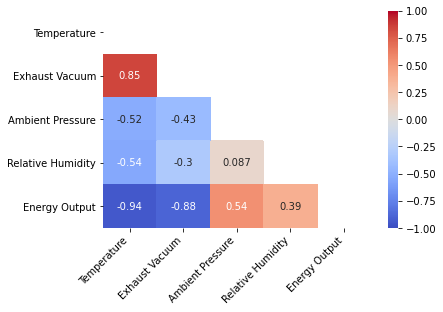

In [78]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

hm=sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    #cmap=sb.diverging_palette(20, 220, n=200),
    cmap='coolwarm',
    square=False,
    annot=True,    
    mask=mask
)
hm.set_xticklabels(
    hm.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### **2.2.Pair Plot**

Text(0.5, 0.98, 'Pair Plot')

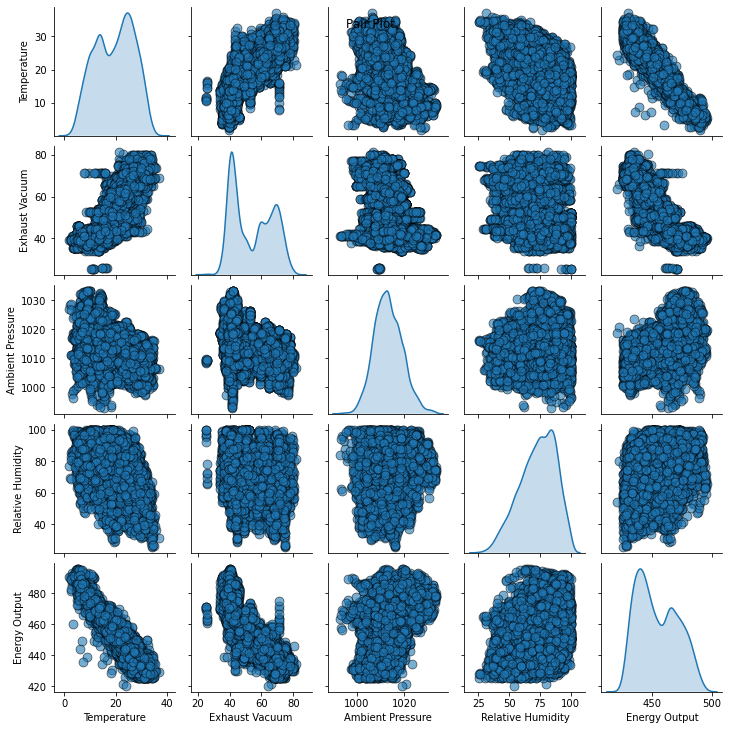

In [79]:
sb.pairplot(
            ds,
            diag_kind='kde',
            plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
            height=2
            )
plt.suptitle('Pair Plot')

#### **2.3.Pair Grid**

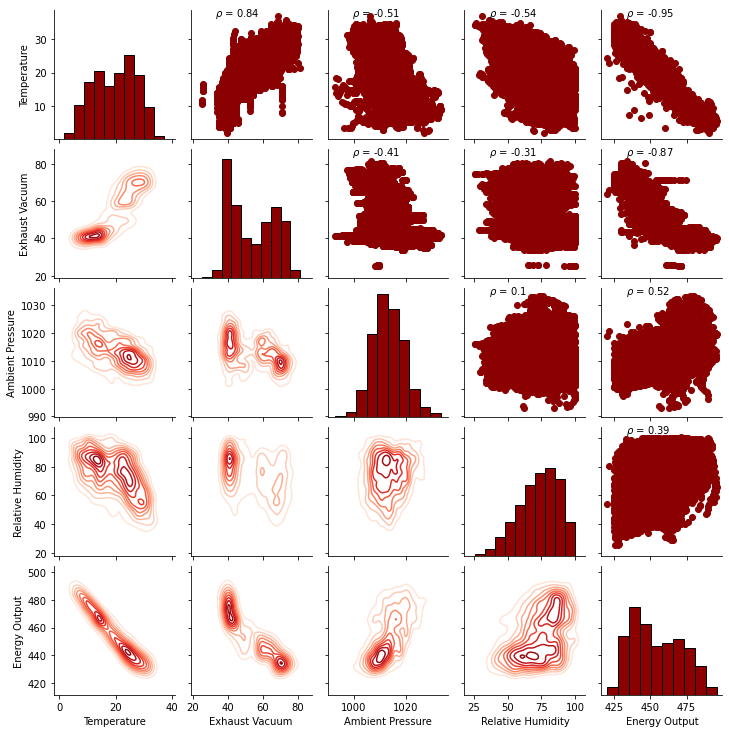

In [80]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 10, xycoords = ax.transAxes)

#pair grid
grid = sb.PairGrid(data= ds,
                    vars = ['Temperature','Exhaust Vacuum','Ambient Pressure','Relative Humidity','Energy Output'],
                    height = 2)
#scatter plots in the upper triangle
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)

#historgram in the diagonal
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', 
                     edgecolor = 'k')
#density plots in lower triangle
grid = grid.map_lower(sb.kdeplot, cmap = 'Reds')


### **3. Multiple Regression**

#### **3.1.Splitting Data**

In [131]:
X_train,X_test,Y_train,Y_test = train_test_split(
    ds[["Temperature", "Exhaust Vacuum","Ambient Pressure","Relative Humidity"]],
    ds[["Energy Output"]],
    test_size=0.2,
    random_state=0
    )
print (f"Training Set Size: {X_train.shape[0]}")
print (f"Test Set Size: {X_test.shape[0]}")

Training Set Size: 7654
Test Set Size: 1914


#### **3.2.Linear Regression with sklearn**

In [98]:
lr = LinearRegression(fit_intercept=True)
pr=lr.fit(X_train,Y_train)
print(f'R-Squared (train): {lr.score(X_train, Y_train)}')
print(f'R-Squared (test): {lr.score(X_test, Y_test)}')
print(f'Coefficient: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')

R-Squared (train): 0.928386493021746
R-Squared (test): 0.929899469443679
Coefficient: [[-1.98040067 -0.23249053  0.06705059 -0.15737393]]
Intercept: [449.531627]


#### **3.3.Linear Regression with statsmodels.api OLS (Ordinary Least Squares)**

In [112]:
X_train = sm.add_constant(X_train)
smmodel = sm.OLS(Y_train,X_train).fit()
print("Fit Parameters:")
print(smmodel.params)
print()
smmodel.summary()


Fit Parameters:
const                449.531627
Temperature           -1.980401
Exhaust Vacuum        -0.232491
Ambient Pressure       0.067051
Relative Humidity     -0.157374
dtype: float64



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Energy Output   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.479e+04
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:35:21   Log-Likelihood:                -22495.
No. Observations:                7654   AIC:                         4.500e+04
Df Residuals:                    7649   BIC:                         4.503e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               449.5316     10.988     40.912      0.000     427.993     471.071
Temperature          -1.9804      0.017   -115.680      0.000      -2.014      -1.947
Exhaust Vacuum       -0.2325      0.008    -28.533      0.000      -0.248      -0.217
Ambient Pressure      0.0671      0.011      6.290      0.000       0.046       0.088
Relative Humidity    -0.1574      0.005    -33.660      0.000      -0.167      -0.148
==============================================================================
Omnibus:                      862.244   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4667.806
Skew:                          -0.408   Prob(JB):                         0.00
Kurtosis:                       6.738   Cond. No.                     2.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### **3.4.Predict**

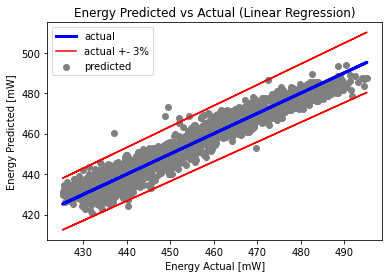

In [147]:
X_test = sm.add_constant(X_test)
Y_pred = smmodel.predict(X_test)
plt.scatter(Y_test,Y_pred,color='gray', label='predicted')
plt.plot(Y_test,Y_test,color='blue', linewidth=3, label='actual')
plt.plot(Y_test,Y_test*1.03,color='red', linewidth=1.5, label='actual +- 3%')
plt.plot(Y_test,Y_test*0.97,color='red', linewidth=1.5 )
plt.title('Energy Predicted vs Actual (Linear Regression)')  
plt.xlabel('Energy Actual [mW]')  
plt.ylabel('Energy Predicted [mW]')  
plt.legend(loc="upper left")


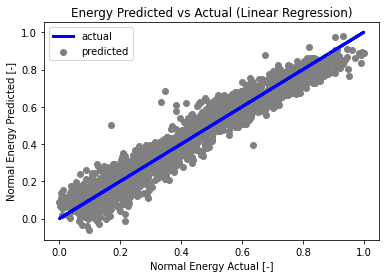

In [149]:
spread = (max(Y_test.values)-min(Y_test.values))
minv=min(Y_test.values)
NY_test = (Y_test-minv)/range
NY_pred = (Y_pred-minv)/range
plt.scatter(NY_test,NY_pred,color='gray', label='predicted')
plt.plot(NY_test,NY_test,color='blue', linewidth=3, label='actual')
plt.title('Energy Predicted vs Actual (Linear Regression)')  
plt.xlabel('Normal Energy Actual [-]')  
plt.ylabel('Normal Energy Predicted [-]')  
plt.legend(loc="upper left")


#### **4. About Dataset**
##### **As copied from [1]**

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.


#### **5. References**

##### 1. [Combined Cycle Power Plant Data Set](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant) from UCI machine learning repository as obtained on July 20th, 2020

##### 2.International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615, [Web Link]. ([Web Link])

##### 3. Heysem Kaya, Pınar Tüfekci , Sadık Fikret Gürgen: Local and Global Learning Methods for Predicting Power of a Combined Gas & Steam Turbine, Proceedings of the International Conference on Emerging Trends in Computer and Electronics Engineering ICETCEE 2012, pp. 13-18 (Mar. 2012, Dubai)

##### 4. Will Koehrsen, Visualizing Data with Pairs Plots in Python [Link](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166) as Accessed on July 28th 2020

##### 5. Chris Shaw, How to customize Seaborn Correlation Heatmaps [Link](https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b) as Accessed on July 28th 2020